# Creating Twitter developer account

To stream data from Twitter, you will need to head over to the [Twitter developer’s website](https://developer.twitter.com/en/apply-for-access) and register your app to get access to the Twitter APIs. The steps are pretty straightforward. However, you need to provide a good explanation as to what you are going to do with the data you receive from Twitter. Hence, this might take a while, but you should be able to get this done pretty easily.

Once you have registered your app, you will be provided with an API access key and API secret key. Store these keys in a safe place because they will only be generated once and you will need them, again and again, to connect to the API.

Once you have done this, head over to the dashboard and give a name to your app. Then access the Access token and generate Access Token Secret key. You will need these two keys as well to connect to the API.

Alright! Now that you have your API access keys, it’s time to stream those tweets!

# Setting up Tweepy

Tweepy is a great library to access the Twitter API. Using Tweepy you can either stream tweets from your timeline, a specific user's timeline, or simply search for specific keyword! All using simple and elegant in-built functions.

## Installing Tweepy

It is pretty straight forward to install Tweepy. You can either use pip to install Tweepy:

pip install tweepy

Or use use Git to clone the repository from GitHub[github article link]

git clone https://github.com/tweepy/tweepy.git

cd tweepy

pip install .

## Authenticating Twitter API

In [1]:
import pandas as pd
import time
from pprint import pprint

Authenticating Twitter API with Tweepy is a piece of cake. 

First, we need to create an OAuthHandler instance which handles the authentication. To this you need to pass the  API key, API secret key and Access token that you saved after setting up your Twitter app. Besides this, you will also need the Access Token Secret key which you can generate by logging into your developer account and generating one for the Twitter app that you set you.

In [2]:
# Twitter API authentication

import tweepy

api_key = #<api-key>
api_secret_key = #api_secret_key
access_token = #access_token
access_token_secret = #access_token_secret

# authorize the API Key
authentication = tweepy.OAuthHandler(api_key, api_secret_key)

# authorization to user's access token and access token secret
authentication.set_access_token(access_token, access_token_secret)

Once you have done that, you can finally create the API object by passing in the authentication information. 

In [3]:
# call the api
api = tweepy.API(authentication)

Now you can finally stream your data using Tweepy!

# Streaming Tweets using Tweepy

There are couple of way to access the data from Twitter. Let's start with the first one, accessing tweets from our own timeline.

To do that you need to use the API object's [home_timeline()](http://docs.tweepy.org/en/v3.5.0/api.html#API.home_timeline) function. By default it returns 20 most recent tweets from your timeline but you can change that using the **count** parameter. 

In [4]:
# Streaming tweets from timeline

public_tweet = api.home_timeline(count=5)

for tweet in public_tweet:
    print("-->",tweet.text)

--> "Congress party, especially Rahul Gandhi, trying to weaken national resolution": Union Minister Ravi Shankar Prasad https://t.co/qIK7FkZlFu
--> The Humble Software Bundle: Your Sounds. Your Movies. Professional Video and Audio Creation recently launched

It c… https://t.co/7Bj92t728k
--> In the narrative about “shift,” the incumbent, President Trump, is seen as a strong friend of India while Joe Biden… https://t.co/MUW6ZGpFWo
--> On Gulzar's 86th birthday, read his searing poem on the lockdown 'Mazdoor/Mahamaari II', in which he draws a parall… https://t.co/lzUs9kVklQ
--> RT @NPDay: .@rsprasad alleges that @RahulGandhi has been trying to weaken the unity of India in its fight against coronavirus since day one…


You can even use tweepy to access tweets from another user's timeline. For this, you have to the the API object's [user_timeline()](http://docs.tweepy.org/en/v3.5.0/api.html#API.user_timeline) function.

In [6]:
# Streaming tweets from user timeline

user = "AnalyticsVidhya"
public_tweet = api.user_timeline(id=user,count=5)

for tweet in public_tweet:
    print("-->",tweet.text)


--> @Facebook Research recently open-sourced their new library - TransCoder. It is a transcompiler to translate source… https://t.co/HYMP0sUPWK
--> Let's talk about advanced NLP. Shall we? Here's the perfect guide for you!
Transfer Learning for NLP: Fine-Tuning B… https://t.co/LjZFsgEN5T
--> Non-max suppression is the final step of these object detection #algorithms and is used to select the most appropri… https://t.co/n3RvKJzeeC
--> Natural Language Processing has transformed over the years but let's take a step ahead in the world of Natural Lang… https://t.co/xYeXAV4nrk
--> "Google it!”- Isn’t it something we say every day?
Learn the art of Information Retrieval using word2vec based Vect… https://t.co/pqWJ78G6N6


Alright now that you have got your hands dirty by streaming tweets, it is important to understand the various data fields that are being retireved along with the tweet text. Let's dive deep and unravel the streaming data.

# Streaming Tweets on Keywords

The Twitter API returns the data in JSON format. So far we had just accessed the text from the tweet using tweet.text. But there is more to what is being returned by Twiter API. To understand that, let's stream tweet on a specific topic. 

Since we are looking to analyse tweets around Covid-19, lets stream those tweets using the API object's [search()](http://docs.tweepy.org/en/v3.5.0/api.html#API.search) method.

https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets

In [124]:
# Retrieve tweets
result = api.search(['covid','Covid-19','COVID-19'], lang='en', count=10)

# JSON keys
pprint(result[0]._json.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


The search() method has some important parameters.

There is a wealth of information being returned here. As you must has noticed, the API returns the Tweet and related information in a JSON format. Each Tweet JSON contains informaiton about the tweet, the user, entities like hashtags and mentions, and so on. There can be over 150 attributes associated with the Tweet! Let's try to understand some of the important fields in the Tweet JSON that are returned by the API.

* id - This integer attribute is an unique identifier for the Tweet.
* text - This is the Tweet text that we are looking for. It can contain upto 140 characters.
* user - Contains details about the author of the tweet as a nested field. Information like user id, user creation date, screen name, etc. can all be found in this field.
* entities - This field contains information such as hashtags, mentions, links, etc. These are also present as nested fields.
* truncated - In 2017, Twitter extended the Tweet JSON to include longer messages of upto 280 character length. This field indicated whether the Tweet is shorter than 140 characters or not. If the tweet is longer than 140 characters, it returns True otherwise it returns False.
* extended_tweet - In case the tweet contains more than 140 characters, the tweet and the entity information will be truncated in the root-level fields. To access those, you need to access the fields nested within *extended_tweet* 

You can access the Tweet JSON using the following command.

In [11]:
pprint(result[0].user._json)

{'contributors_enabled': False,
 'created_at': 'Mon Jun 30 01:06:09 +0000 2014',
 'default_profile': False,
 'default_profile_image': False,
 'description': '✌🏾✌🏾✌🏾',
 'entities': {'description': {'urls': []}},
 'favourites_count': 35261,
 'follow_request_sent': False,
 'followers_count': 246,
 'following': False,
 'friends_count': 302,
 'geo_enabled': False,
 'has_extended_profile': True,
 'id': 2654917600,
 'id_str': '2654917600',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 0,
 'location': '',
 'name': '☆𝕵𝖚𝖑𝖎𝖊☆',
 'notifications': False,
 'profile_background_color': 'DD2E44',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': True,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2654917600/1590885202',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/127231013948

To access hashtags from code, use the following code.

In [16]:
pprint(result[4].entities['hashtags'])

[{'indices': [30, 42], 'text': 'BidenHarris'},
 {'indices': [111, 119], 'text': 'COVID19'}]


Now, Twitter API's search() method is great. But there is a drawback to it. It retrieves Tweets using the Search API which gives results from the past, going as far as 7 days. This means that the Tweets retrieved aren't actually in real-time. The Search API also has a limit of 180 tweets per 15 minute window. Also, the Tweets retrieved aren't exhaustive. Meaning there might be some Tweets, matching the keywords, might be missing from those that are returned by the API. So, how do we stream Tweets in real-time? We use the Streaming API!

# Creating Database in PostgreSQL

Let's create a database in Postgresql where we will create multiple tables to store data that we receive from Twitter API. To create a database in Postgresql, we are going to the use the pgAdmin tool that got installed when we installed Postgresql.

Since Postgresql supports Python programming language, we will leverage that capability later on in the article to create tables inside this database. For now, let's setup our Twitter API!

# Creating Tables in PostgreSQL

Now that we know how to stream tweets using the Twitter API, it time to define those tables inside the TwitterDb database that we created using pgAdmin.

Rememeber that I said Postgresql support the Python Programming. Well, how does it do that? It provides a very popular database adapter called psycopg that let's enjoy best of both the worlds, Python and Postgresql!

You need to first install psycopg using the pip command.

In [571]:
# !pip install psycopg

Now, let's first write up the commands for creating the tables. Since Postgresql suport SQL language, the syntax should be pretty easy to grasp. The important part hoever is understanding the various tables and how they are related to each other.

We are going to create three tables in the database. 

The first table will be called TwitterUser. It will contain user specific information.
* user_id - Unique user id. This will be the PRIMARY KEY for the table.
* user_name - User screen name

The second table will be called TwitterTweet. It will contain tweet specific information.
* tweet_id - Unique tweet id. This will be the PRIMARY KEY for the table.
* tweet - Tweet text
* retweet_count - Number of times the tweet was retweeted
* user_id - To relate the user information with their tweet information, we going to include the user_id fromt eh TwitterUser table as a FOREIGN KEY in this table.

The third table will called TwitterEntity. It will contain entity information. Specifically we will be storing hashtags from the tweet but you can store other fields as well.
* id - Unqiue to represent the rows. It will be of SERIAL type which will make sure that this field incrmenets automatically as new rows are added to the table. We don't have to provide this value, the databse will handle it on its own (perks of using Postgresql ;))
* hashtag - It will store the hastags and will be of VARCHAR type.
* tweet_id - To relate the table to TwitterTweet table, we will include the tweet_id as FOREIGN KEY in the table.


Since the table are related to each other, it is important to create the table in order otherwise we will get an error. First we will create the TwitterUser table, then TwitterTweet and finally TwitterEntity table. Let's write these commands in a simple tuple.

In [34]:
# Table creation
commands = (# Table 1
            '''Create Table TwitterUser(User_Id BIGINT PRIMARY KEY, User_Name TEXT);''',
            # Table 2
            '''Create Table TwitterTweet(Tweet_Id BIGINT PRIMARY KEY,
                                         User_Id BIGINT,
                                         Tweet TEXT,
                                         Retweet_Count INT,
                                         CONSTRAINT fk_user
                                             FOREIGN KEY(User_Id)
                                                 REFERENCES TwitterUser(User_Id));''',
            # Table 3
            '''Create Table TwitterEntity(Id SERIAL PRIMARY KEY,
                                         Tweet_Id BIGINT,
                                         Hashtag TEXT,
                                         CONSTRAINT fk_user
                                             FOREIGN KEY(Tweet_Id)
                                                 REFERENCES TwitterTweet(Tweet_Id));''')

Now, let's make a connection to the Postgresql server using psycopg. For that you need to import the psycopg module and call the connect() method. In the method you need to pass some important argument.
* host - Database server address
* port - The port number on which the server is runnning. By default it is 5432.
* database - Name of the database name you want to connect to.
* user - The username to authenticate.
* password - Password to authenticate the user.

In [5]:
import psycopg2

# Connection to database server
conn = psycopg2.connect(host="localhost",database="TwitterDB",port=5432,user="postgres",password="India123")

The connect() method creates a new Database session and returns instance of connection class. Now we need to generate a Cursor object using the cursor() method which allows us to execute queries against a database using the execute() method.

In [6]:
# Create cursor to execute SQL commands
cur = conn.cursor()

# Execute SQL commands
for command in commands:
    # Create tables
    cur.execute(command)

# Close communication with server
conn.commit()
cur.close()
conn.close()

Don't forget to commit the changes and close connection after use so that the database doesn't get locked!

# StreamListener

The [Streaming API](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/filter-realtime/overview) lets you stream Tweets in real-time. It is useful for obtaining large number of tweets or for creating a live stream of tweets. Unlike the Search API, which pulls data from Twitter, the Streaming API pushes messages to a persistent session. 

"Rather than delivering data in batches through repeated requests by your client app, as might be expected from a REST API, a single connection is opened between your app and the API, with new results being sent through that connection whenever new matches occur. "(https://developer.twitter.com/en/docs/tutorials/consuming-streaming-data)

The Streaming API also returns data in JSON and with the same fields as the Search API. We will use the Tweepy's [StreamListener class](https://github.com/tweepy/tweepy/blob/64b42e560a71d3bbcf9cb47f039e158a860eb979/tweepy/streaming.py#L30) to stream real-time tweets. This class has several methods to handle tweets. The on_data() method in this class which receives the messages and calls the apprropriate method. The on_status() method handles the staus of the tweet. Since we are only concerned about the tweet created by the user, we will be working with the on_status() method.

We need to create a custom class that will inherit the StreamListener class and override the on_status() method. Here we will write our own code to extract the relevant data from the tweet. We will also override the on_error() method that handle any errors that occurs during the connection. We are concerned about error 420 which occurs when we exceed the limit on the number of attempts to connect to the Streaming API.

In [12]:
class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self, time_limit=300):
        self.start_time = time.time()
        self.limit = time_limit
        self.conn = conn
        super(MyStreamListener, self).__init__()
    
    def on_connect(self):
        print("Connected to Twitter API.")
        
    def on_status(self, status):
        
        
        # Tweet ID
        tweet_id = status.id
        
        # User ID
        user_id = status.user.id
        # Username
        username = status.user.name
        
        
        # Tweet
        if status.truncated == True:
            tweet = status.extended_tweet['full_text']
            hashtags = status.extended_tweet['entities']['hashtags']
        else:
            tweet = status.text
            hashtags = status.entities['hashtags']
        
        # Read hastags
        hashtags = read_hashtags(hashtags)            
        
        # Retweet count
        retweet_count = status.retweet_count
        # Language
        lang = status.lang
        
        
        # If tweet is not a retweet and tweet is in English
        if not hasattr(status, "retweeted_status") and lang=="en":
            # Connect to database
            connect(conn, user_id, username, tweet_id, tweet, retweet_count, hashtags)
            
        if (time.time() - self.start_time) > self.limit:
            
            print(time.time(), self.start_time, self.limit)
            return False
            
    def on_error(self, status_code):
        if status_code == 420:
            # Returning False in on_data disconnects the stream
            return False

As you can see, I have put the code to read the tweet inside the if-else loop. This is so because if the tweet is an extended tweet, exceeding 140 characters, it will be truncated. To retrieve the full tweet in that case would mean that we have to access the tweet from the extended_tweet field rather than reading from the root-level.

We will be only connecting and saving the tweet to the database when the tweet is in English and is not retweeted, since we are only converned about new tweets here.

I have also included a code to pass False as the output when the time exceeds the time_limit. This I have done to make sure the connection doesn't stay alive forever. I will only be keeping it alive for 60 seconds. You can change this according to your needs.

Since the hashtags field dictionary (containing hashtags and their character indexing in the tweet) are saved within a list in the entities field, I have written a custom method read_hashtags() to extract only the hashtags an save them in a Python list.

In [10]:
# Extract hashtags
def read_hashtags(tag_list):
    hashtags = []
    for tag in tag_list:
        hashtags.append(tag['text'])
    return hashtags

Finally, to connect to the database and save the tweets, I have written a custom connect() method. Which we will discuss in the next section.

# Connecting to the Database

We have already seen how to connect to the database and how to execute SQL commands from Python using psycopg. Now we will do those together. Whenever a tweet needs to be saved to the database, we will first open a connection to the database, execute the SQL command to the database, commit the changes, and finally close the connection. This is what is happening in the connect() method below.

In [19]:
# Insert Tweet data into database
def connect(user_id, user_name, tweet_id, tweet, retweet_count, hashtags):
    
    conn = psycopg2.connect(host="localhost",database="TwitterDB",port=5432,user="postgres",password="India123")
    
    cur = conn.cursor()

    # insert user information
    command = '''INSERT INTO TwitterUser (user_id, user_name) VALUES (%s,%s) ON CONFLICT
                 (User_Id) DO NOTHING;'''
    cur.execute(command,(user_id,user_name))

    # insert tweet information
    command = '''INSERT INTO TwitterTweet (tweet_id, user_id, tweet, retweet_count) VALUES (%s,%s,%s,%s);'''
    cur.execute(command,(tweet_id, user_id, tweet, retweet_count))
    
    # insert entity information
    for i in range(len(hashtags)):
        hashtag = hashtags[i]
        command = '''INSERT INTO TwitterEntity (tweet_id, hashtag) VALUES (%s,%s);'''
        cur.execute(command,(tweet_id, hashtag))
    
    # Commit changes
    conn.commit()
    
    # Disconnect
    cur.close()
    conn.close()

There are however two important things to point out here.

First, I have used the [ON CONFLICT](https://www.postgresqltutorial.com/postgresql-upsert/) command while inserting information into the TwitterUser table that is storing information about the author of the Tweet. This is so because a user can create multiple tweets but we don't want to store the information about the same user multiple times. That's the beauty of RDBMS!

Second, I have used a for-loop for inserting information into the TwitterEntity table. This is so because the hashtags parameter received by this funciton is a Python list that we generated in our custom MyStreamListener class. Since RDBMS needs to maintin atomicity, we need to insert each of these hashtags as new rows.

Once we are done adding values to the tables, we commit and close the connection.

# Streaming Tweets into Database

Now that we have setup up how we will stream tweets in real-time and how they will be stored in the database, it is time to call the Streaming API and store those tweets in the databse. To so that we need to first create an instanse of our MyStreamListener() class. This instance along with our API authentication will be passed to tweepy.Stream() method. Finally we can filter the keywords we want to receive by using the filter() method on the instance returned by tweepy.Stream().

In [ ]:
# Streaming tweets

myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth=api.auth, listener=myStreamListener,
                        tweet_mode="extended")
myStream.filter(track=['Covid','covid-19'])

The tweet_mode argument specifies whether you want to access the tweets in extended mode or not. 

Now that we have successfully streamed and stored the tweets, its time to analyze them!

# Analyzing streamed tweets

Having finished witht the tricky part already, analysing tweets should be a piece of cake! I am going to do three things here.
* Check out the most commonly occuring words in the tweets.
* Determine the sentiment of the tweets.
* Chart out the count of the hashtags that we mined from the tweets.

Let's start out by importing the relevant libaries.

In [67]:
from nltk.stem import WordNetLemmatizer 
import numpy as np
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

First thing to do when working with text data is to preprocess the text. So let's do that!

We are going to do the following things to preprocess the tweets:
* Remove tweet urls.
* Remove any mentions that were present in the tweet.
* Remove all non-alphanumeric characters from the tweet.
* Lemmatize the words in the tweet
* Finally convert the tweet to lowercase.

In [41]:
# Cleaning the tweets
def preprocess(tweet):
    
    # remove links
    tweet = re.sub(r'http\S+', '', tweet)
    # remove mentions
    tweet = re.sub("@\w+","",tweet)
    # alphanumeric and hashtags
    tweet = re.sub("[^a-zA-Z#]"," ",tweet)
    # remove multiple spaces
    tweet = re.sub("\s+"," ",tweet)
    tweet = tweet.lower()
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sent = ' '.join([lemmatizer.lemmatize(w) for w in tweet.split() if len(lemmatizer.lemmatize(w))>3])

    return sent

I am going to create a separate function to execute the SQL queries on the database.

In [ ]:
# Connecting to the Database
def DbConnect(query):
    
    conn = psycopg2.connect(host="localhost",database="TwitterDB",port=5432,user="postgres",password="India123")
    curr = conn.cursor()
    
    curr.execute(query)
    
    rows = curr.fetchall()
    
    return rows

Now, let's write up the SQL queries to retrieve the tweets from the database and save the resulting data into a dataframe for analyzing.

In [111]:
# Create 
data_tweet = DbConnect("SELECT User_Id, Tweet_Id, Tweet FROM TwitterTweet;")

df_tweet = pd.DataFrame(columns=['User_Id','Tweet_Id','Clean_Tweet'])

for data in data_tweet:
    index = len(df_tweet)
    df_tweet.loc[index,'User_Id'] = data[0]
    df_tweet.loc[index,'Tweet_Id'] = data[1]
    df_tweet.loc[index,'Clean_Tweet'] = preprocess(data[2])
    
df_tweet.head()

,User_Id,Tweet_Id,Clean_Tweet
0,1193031229974515719,1294474129723154433,gala karosh yane sore throat covid symptom
1,4463202803,1294474131866415104,unless republican feel massive pressure return...
2,55470944,1294474132252266496,thought decade india began
3,1356041072,1294474135943487488,fuck death every elected official party level ...
4,362969080,1294474136618708992,post from bobby steve severe case covid steve ...


Let's create a wordcloud of the most commonly occuring words in the tweets.

In [60]:
# Most commomly occuring words
def keywords():
    all_words = ' '.join([text for text in df_tweet['Clean_Tweet']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

keywords()

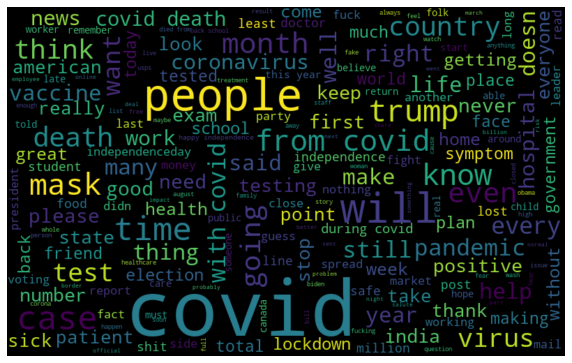

We can notice words like "Covid", "mask", "pandemic", "virus", "lockdown", etc. occuring quite frequently in the tweets (as expected).

Let's check out the sentiment of the tweets using the [Textblob](https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/) library. We will be using the sentiment() method to call upon the tweet and check out the polarity of the sentiment. Polarity of -1 means that the tweet is a negative statement and 1 means that the tweet is a positive statement (a blessing in these tough times!).

In [125]:
# Sentiment analysis using Textblob
def sentiment(tweet):

    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
df_tweet['Sentiment'] = df_tweet['Clean_Tweet'].apply(sentiment)

df_tweet.head()

,User_Id,Tweet_Id,Clean_Tweet,Sentiment
0,1193031229974515719,1294474129723154433,gala karosh yane sore throat covid symptom,0
1,4463202803,1294474131866415104,unless republican feel massive pressure return...,1
2,55470944,1294474132252266496,thought decade india began,0
3,1356041072,1294474135943487488,fuck death every elected official party level ...,-1
4,362969080,1294474136618708992,post from bobby steve severe case covid steve ...,-1


Now let's do the final thing we wanted to achieve in this analysis - determining the most commonly occuring hashtags!

First we need to query and retrieve the hashtags from out TwitterEntity table in the database.

In [126]:
# Querying hashtags from database
data_tags = DbConnect("SELECT Tweet_Id, Hashtag FROM TwitterEntity;")

df_tags = pd.DataFrame(columns=['Tweet_Id','Hashtags'])

for data in data_tags:
    index = len(df_tags)
    df_tags.loc[index,'Tweet_Id'] = data[0]
    df_tags.loc[index,'Hashtags'] = data[1]
    
df_tags.head()

,Tweet_Id,Hashtags
0,1294474131866415104,SaveThePostOffice
1,1294474137491120133,SaveThePostOffice
2,1294474137491120133,SaveTheUSPS
3,1294474137491120133,USMailNotForSale
4,1294474144243838977,IndependenceDay2020


We have 277 unique hashtags here, that's almost 75% of the total number of tweets we mined from Twitter! People surely use hasgtags a lot in their tweets.

Let's create a [pivot table](https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/) to determine the count of the unique hashtags from the tweets. 

In [123]:
# Unique hashtag counts
table = df_tags.pivot_table(index="Hashtags",values='Tweet_Id',aggfunc=len)

# Convert pivot table to dataframe
df_pivot = pd.DataFrame(table.to_records())

df_pivot.head()

,Hashtags,Tweet_Id
0,100daysofCode,1
1,15Aug2020,1
2,15August,1
3,2020VISION,1
4,AG,1


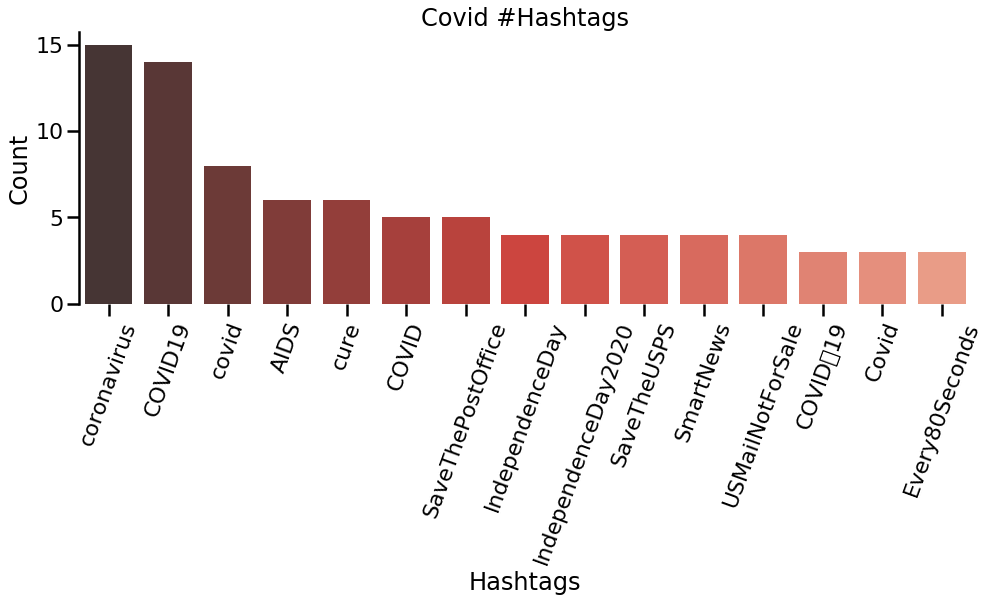

In [116]:
# Plotting hashtags counts

data = df_pivot.nlargest(columns="Tweet_Id", n = 15) 

# Creating bar graph
plt.figure(figsize=(16,5))
ax = sns.barplot(data=data, x= "Hashtags", y = "Tweet_Id", palette=("Reds_d"))

# Altering the visual elements
sns.set_context("poster")
ax.set(ylabel = 'Count')
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=70)

plt.title('Covid #Hashtags')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Output plot
plt.show()

As you can see, although COVID-19 is mostly talked about in the tweets, there are other events that people want to talk about in their tweets as well. Twitter is truely THE place to understand the present feelings of the people, well done Twitter!

# Endnotes

Awesome! We streamed tweets in real-time, stored them in a database, and finally analyzed them. This was really a func project to work on, hope you enjoyed it too!

Surely, there were a lot of other things we could have mined and analysed from the tweets, but I leave it up to you experiment with them and come up with your own mind-boggling analysis. You can check out this [amazing article](https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/) and this super awesome [free course](https://courses.analyticsvidhya.com/courses/twitter-sentiment-analysis) on Twitter analysis that we have created for you.

Going forward, I encourage you to also check out this article on [how to deploy your machine learning model with Flask](https://www.analyticsvidhya.com/blog/2020/04/how-to-deploy-machine-learning-model-flask/), I am sure it is a mystery for most of you ;)